In [1]:
import numpy as np
import scipy
import os
import simulation_scripts
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
plt.rcParams["font.size"] = 12
plt.rcParams["axes.prop_cycle"] = cycler(
    color=[
        "tab:blue",
        "tab:red",
        "tab:purple",
        "tab:orange",
        "tab:cyan",
        "tab:pink",
        "tab:olive",
    ]
)

# Simulation Code

Processing frequency 1 of 5000.
Processing frequency 11 of 5000.
Processing frequency 21 of 5000.
Processing frequency 31 of 5000.
Processing frequency 41 of 5000.
Processing frequency 51 of 5000.
Processing frequency 61 of 5000.
Processing frequency 71 of 5000.
Processing frequency 81 of 5000.
Processing frequency 91 of 5000.
Processing frequency 101 of 5000.
Processing frequency 111 of 5000.
Processing frequency 121 of 5000.
Processing frequency 131 of 5000.
Processing frequency 141 of 5000.
Processing frequency 151 of 5000.
Processing frequency 161 of 5000.
Processing frequency 171 of 5000.
Processing frequency 181 of 5000.
Processing frequency 191 of 5000.
Processing frequency 201 of 5000.
Processing frequency 211 of 5000.
Processing frequency 221 of 5000.
Processing frequency 231 of 5000.
Processing frequency 241 of 5000.
Processing frequency 251 of 5000.
Processing frequency 261 of 5000.
Processing frequency 271 of 5000.
Processing frequency 281 of 5000.
Processing frequency 291 

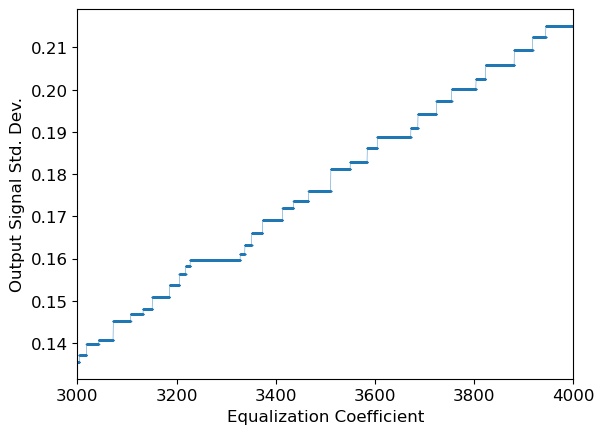

In [3]:
equalization_coeffs = np.linspace(3000, 4000, num=5000)
final_variances = simulation_scripts.requantization_sim(
    np.full_like(equalization_coeffs, 1.25e-4),
    equalization_coeffs,
)
plt.plot(
    equalization_coeffs,
    final_variances,
    ".-",
    markersize=.5,
    linewidth=0.3,
)
plt.xlim([np.min(equalization_coeffs), np.max(equalization_coeffs)])
plt.xlabel("Equalization Coefficient")
plt.ylabel("Output Signal Std. Dev.")
plt.show()

# Instrument Simulation

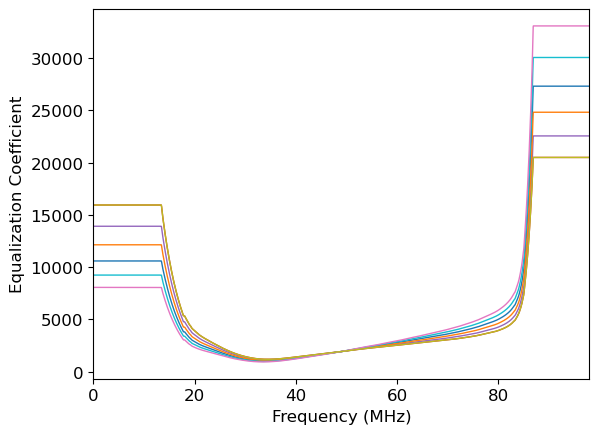

In [4]:
current_dir = os.getcwd()
eq_coeffs_mat = scipy.io.loadmat(
    f"{current_dir}/20251028a-settingsAll-night-FW7p6.mat"
)
channel_width_mhz = 23925.78125 * 1e-6
freq_array = np.arange(len(eq_coeffs_mat["coef"][0, :])) * channel_width_mhz
for ind in range(7):
    plt.plot(freq_array, eq_coeffs_mat["coef"][ind, :], "-", linewidth=1)
plt.xlim([np.min(freq_array), np.max(freq_array)])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Equalization Coefficient")

use_eq_coeffs = eq_coeffs_mat["coef"][0, :]

In [5]:
target_value = 3/2**3  # Ideal stddev for the 4-bit quantization
print(target_value)

0.375


Text(0, 0.5, 'Expected FFT Output Stddev')

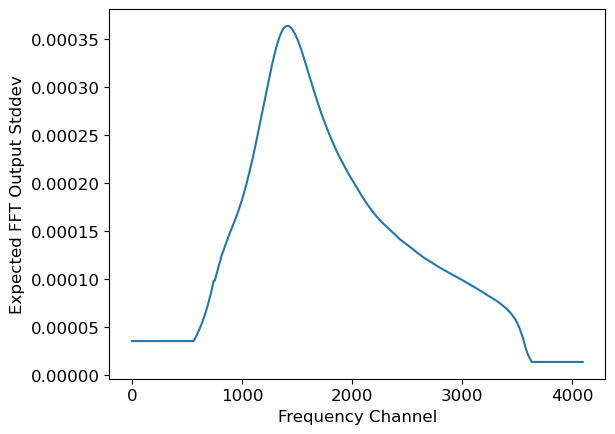

In [6]:
data_stddev = target_value / use_eq_coeffs
plt.plot(data_stddev)
plt.xlabel("Frequency Channel")
plt.ylabel("Expected FFT Output Stddev")

In [7]:
final_variances = simulation_scripts.requantization_sim(
    data_stddev[2000:2100],
    use_eq_coeffs[2000:2100],
)  # Run simulation

Processing frequency 1 of 100.
Processing frequency 11 of 100.
Processing frequency 21 of 100.
Processing frequency 31 of 100.
Processing frequency 41 of 100.
Processing frequency 51 of 100.
Processing frequency 61 of 100.
Processing frequency 71 of 100.
Processing frequency 81 of 100.
Processing frequency 91 of 100.


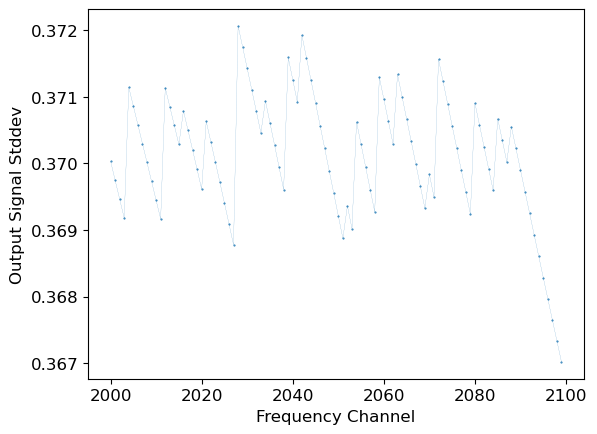

In [8]:
plt.plot(
    np.arange(2000, 2100),
    np.sqrt(final_variances),
    ".-",
    markersize=1,
    linewidth=0.1,
    color="tab:blue",
)
plt.xlabel("Frequency Channel")
plt.ylabel("Output Signal Stddev")
plt.show()

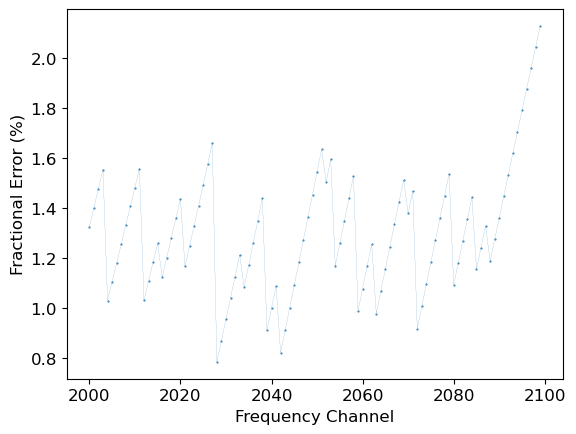

In [9]:
plt.plot(
    np.arange(2000, 2100),
    np.abs(1 - np.sqrt(final_variances) / target_value) * 100,
    ".-",
    markersize=1,
    linewidth=0.1,
    color="tab:blue",
)
plt.xlabel("Frequency Channel")
plt.ylabel("Fractional Error (%)")
plt.show()

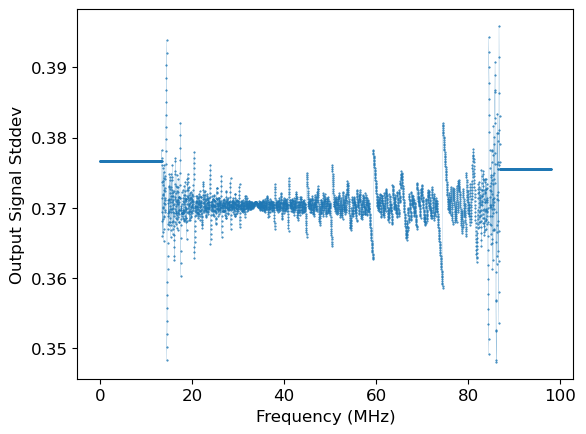

In [28]:
# Full simulation, from file
with open("simulation_output.npy", "rb") as f:
    freq_array = np.load(f)
    final_variances = np.load(f)
f.close()

plt.plot(
    freq_array,
    np.sqrt(final_variances),
    ".-",
    markersize=1,
    linewidth=0.1,
    color="tab:blue",
)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Output Signal Stddev")
plt.show()

# Paper Plots

Text(0, 0.5, '4-bit Quantized Value')

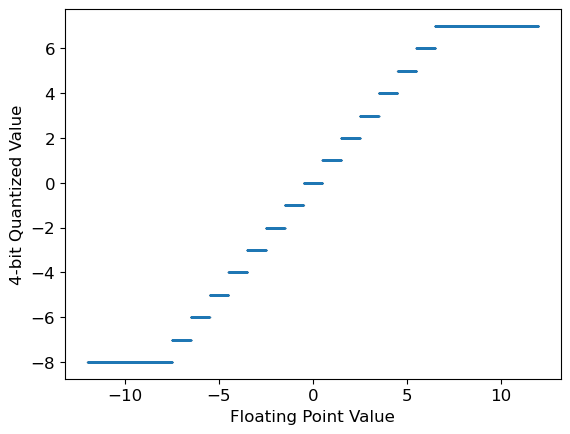

In [10]:
input_vals = np.arange(-12, 12, 0.001)
output_vals = simulation_scripts.quantize(
    input_vals,
    4,
    0,
    signed=True,
    enforce_symmetry=False,
)
plt.plot(input_vals, output_vals, ".", color="tab:blue", markersize=0.1)
plt.xlabel("Floating Point Value")
plt.ylabel("4-bit Quantized Value")
# plt.savefig("/Users/ruby/Downloads/4bit_quantization.png", dpi=300)

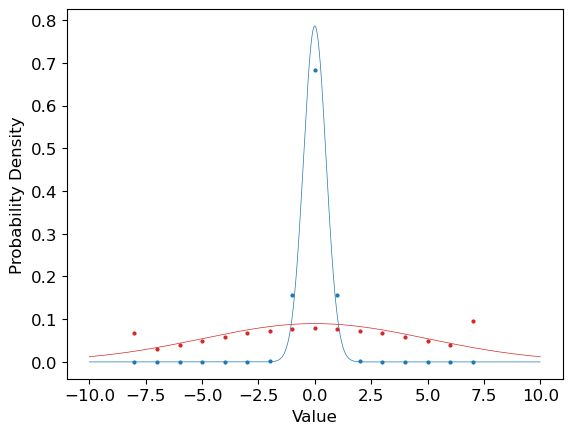

In [11]:
colors = ["tab:blue", "tab:red"]
for ind, stddev in enumerate([.5, 5]):
    color = colors[ind]
    quantized_xvals = simulation_scripts.get_quantized_value_options(
        4, 0, signed=True, enforce_symmetry=False
    )
    analytic_xvals = np.arange(-10, 10, .001)
    gaussian_analytic = np.exp(-(analytic_xvals**2) / (2 * stddev**2))
    gaussian_quantized = simulation_scripts.get_probabilities(stddev, quantized_xvals)
    gaussian_analytic /= np.sum(np.exp(-(quantized_xvals**2) / (2 * stddev**2)))
    plt.plot(analytic_xvals, gaussian_analytic, color=color, linewidth=0.5)
    plt.plot(quantized_xvals, gaussian_quantized, ".", color=color, markersize=4)
    plt.xlabel("Value")
    plt.ylabel("Probability Density")
    # plt.savefig("/Users/ruby/Downloads/quantized_probabilities.png", dpi=300)

Text(0, 0.5, '4-bit Quantized Signal Std. Dev.')

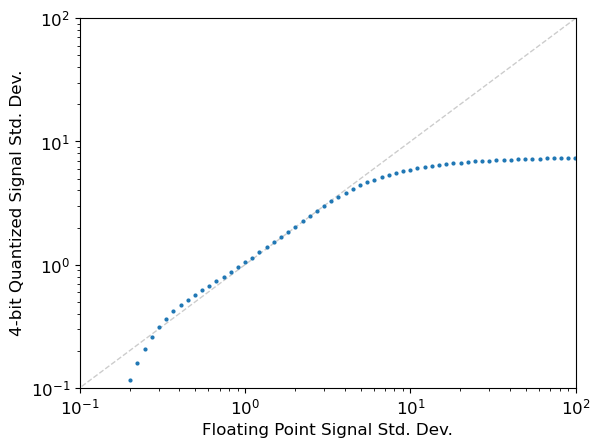

In [12]:
colors = ["tab:blue", "tab:red"]
quantized_xvals = simulation_scripts.get_quantized_value_options(
    4, 0, signed=True, enforce_symmetry=False
)
stddev_array = np.exp(np.arange(-1e1, 1e1, 1e-1))
variance_array = np.zeros_like(stddev_array)
for ind, stddev in enumerate(stddev_array):
    probability = simulation_scripts.get_probabilities(stddev, quantized_xvals)
    variance_array[ind] = simulation_scripts.calculate_variance(
        quantized_xvals, probability
    )

plt.plot([0, 100], [0, 100], "--", color="black", alpha=0.2, linewidth=1)
plt.plot(stddev_array, np.sqrt(variance_array), ".", markersize=4, color="tab:blue")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-1,1e2])
plt.ylim([1e-1, 1e2])
plt.xlabel("Floating Point Signal Std. Dev.")
plt.ylabel("4-bit Quantized Signal Std. Dev.")
# plt.savefig("/Users/ruby/Downloads/quantized_stddev.png", dpi=300)

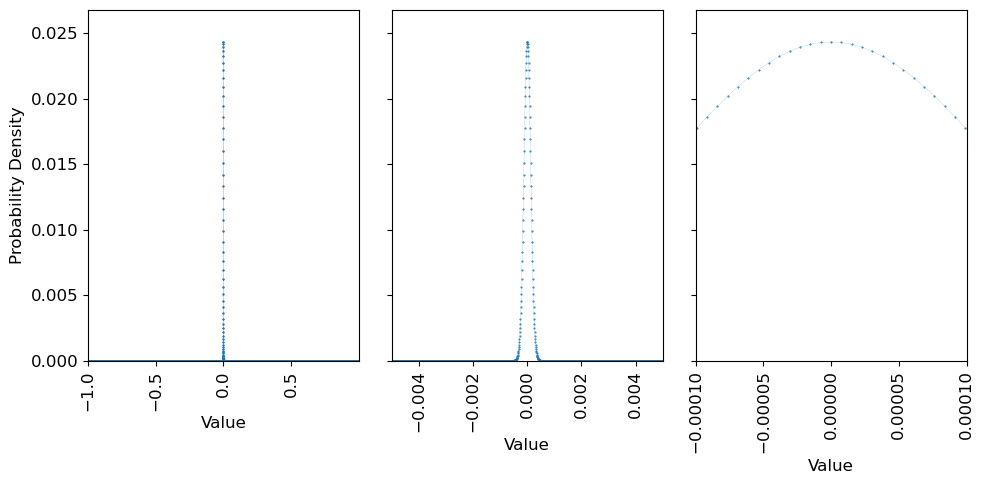

In [13]:
color = "tab:blue"
stddev = 1.25e-4
quantized_xvals = simulation_scripts.get_quantized_value_options(
    18,
    17,
    signed=True,
    enforce_symmetry=False,
)
gaussian_quantized = simulation_scripts.get_probabilities(stddev, quantized_xvals)
fig,ax = plt.subplots(ncols=3, figsize=(10,5), sharey=True)
xmax = [1.1, 5e-3, 1e-4]
for ax_ind in range(3):
    ax[ax_ind].plot(
        quantized_xvals,
        gaussian_quantized,
        ".-",
        color=color,
        markersize=1,
        linewidth=0.1,
    )
    ax[ax_ind].set_xlabel("Value")
    if ax_ind == 0:
        ax[ax_ind].set_xlim([np.min(quantized_xvals), np.max(quantized_xvals)])
    else:
        ax[ax_ind].set_xlim([-xmax[ax_ind], xmax[ax_ind]])
    ax[ax_ind].set_ylim([0, 1.1 * np.max(gaussian_quantized)])
    ax[ax_ind].tick_params(axis="x", labelrotation=90)
ax[0].set_ylabel("Probability Density")
plt.tight_layout()
# plt.savefig("/Users/ruby/Downloads/pdf_nonequalized.png", dpi=300)

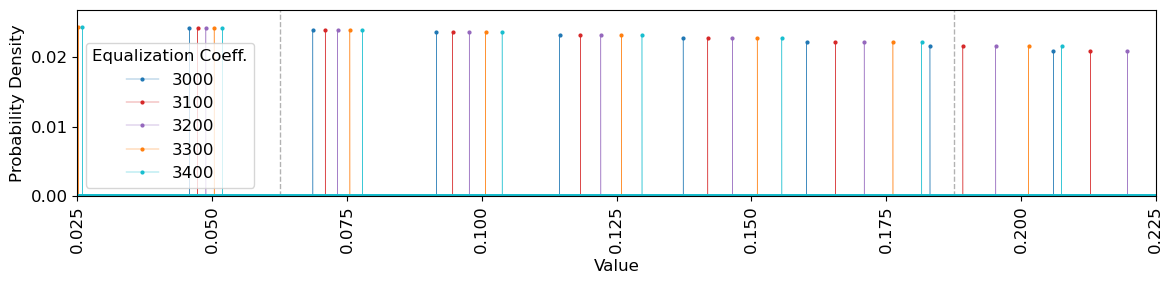

In [14]:
xlimits = np.array([-.8, .8]) * 2**-3 + 0.125
equalized_xvals = simulation_scripts.get_quantized_value_options(
    34,
    19,
    signed=True,
    enforce_symmetry=False,
    return_min=xlimits[0],
    return_max=xlimits[1],
)
requantized_xvals = simulation_scripts.get_quantized_value_options(
    4,
    3,
    signed=True,
    enforce_symmetry=True,
)
requantized_boundaries = (requantized_xvals[1:] + requantized_xvals[:-1])/2
fig, ax = plt.subplots(figsize=(12, 3))
for requant_boundary in requantized_boundaries:
    ax.plot(
        [requant_boundary, requant_boundary],
        [0, 1.1 * np.max(gaussian_quantized)],
        "--",
        color="black",
        alpha=0.3,
        linewidth=1,
    )
for eq_ind, equalization_coeff in enumerate([3000, 3100, 3200, 3300, 3400]):
    equalized_pdf = np.zeros_like(equalized_xvals)
    for ind in range(len(quantized_xvals)):
        equalized_pdf[np.where(equalized_xvals == quantized_xvals[ind]*equalization_coeff)[0]] = gaussian_quantized[ind] 
    ax.plot(
        equalized_xvals,
        equalized_pdf,
        ".-",
        markersize=4,
        linewidth=0.3,
        label=equalization_coeff,
    )
ax.set_xlim([xlimits[0], xlimits[1]])
ax.set_ylim([0, 1.1 * np.max(gaussian_quantized)])
ax.tick_params(axis="x", labelrotation=90)
ax.legend(title="Equalization Coeff.")
ax.set_xlabel("Value")
ax.set_ylabel("Probability Density")
plt.tight_layout()
# plt.savefig("/Users/ruby/Downloads/pdf_equalized.png", dpi=300)

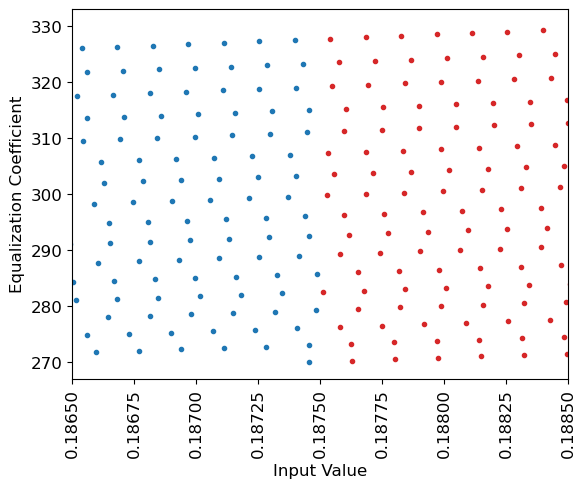

In [15]:
equalization_coeffs = simulation_scripts.get_quantized_value_options(
    16,
    2,
    signed=False,
    enforce_symmetry=False,
    return_min=270,
    return_max=330,
)
for eq_coeff in equalization_coeffs:
    quantized_xvals1 = (quantized_xvals * eq_coeff)[
        np.where(quantized_xvals * eq_coeff < 0.1875)
    ]
    quantized_xvals2 = (quantized_xvals * eq_coeff)[
        np.where(quantized_xvals * eq_coeff > 0.1875)
    ]
    plt.plot(
        quantized_xvals1,
        np.full_like(quantized_xvals1, eq_coeff),
        ".",
        color="tab:blue",
    )
    plt.plot(
        quantized_xvals2,
        np.full_like(quantized_xvals2, eq_coeff),
        ".",
        color="tab:red",
    )
plt.xlim([0.1875-.001, 0.1875+.001])
plt.xlabel("Input Value")
plt.ylabel("Equalization Coefficient")
plt.tick_params(axis="x", labelrotation=90)

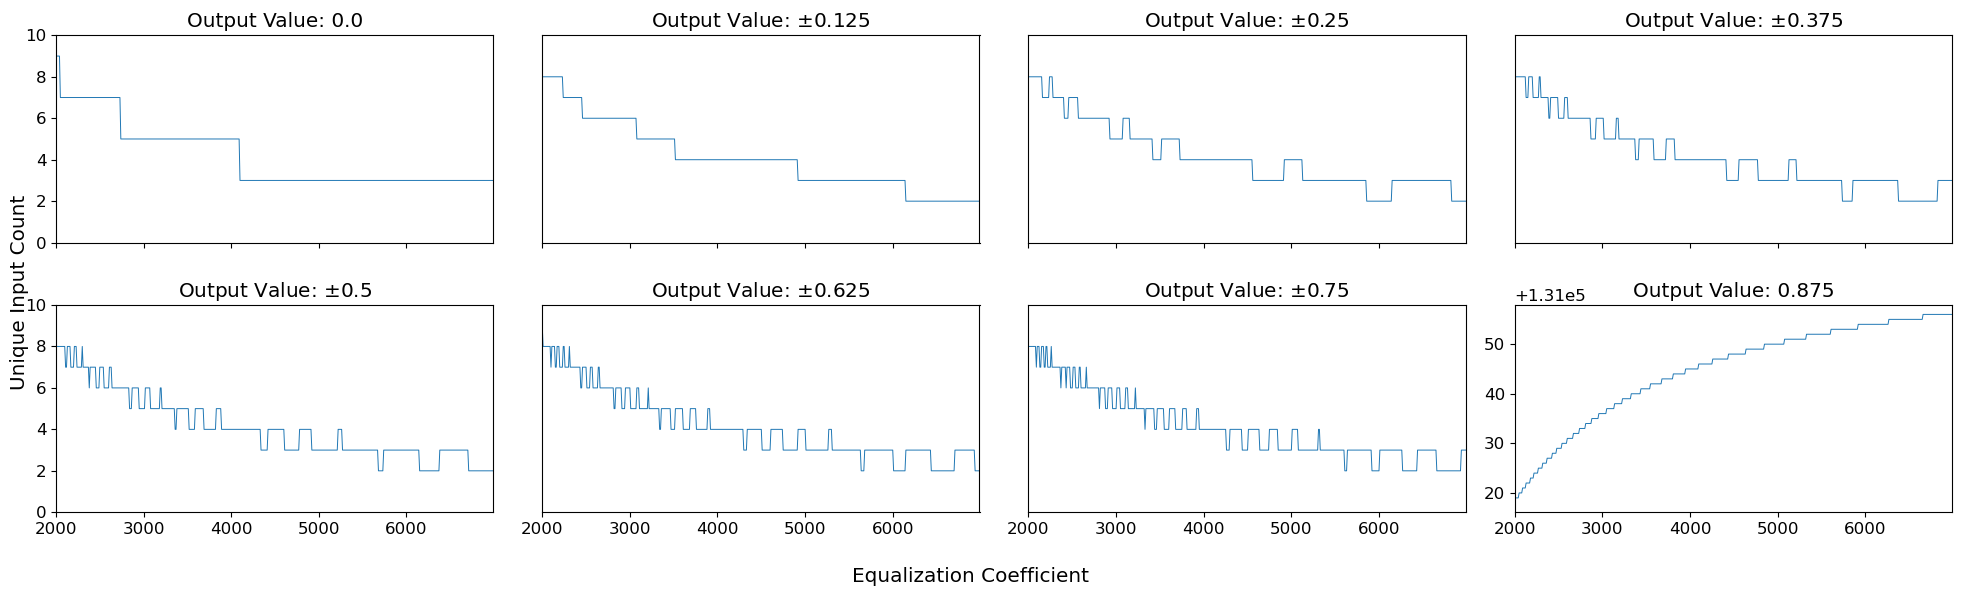

In [16]:
eq_coeffs = np.arange(2000, 7000, 10)
use_requantized_value_options = simulation_scripts.get_quantized_value_options(
    4,
    3,
    signed=True,
    enforce_symmetry=True,
)
number_of_values = np.zeros((len(eq_coeffs), len(use_requantized_value_options)), dtype=int)

for coeff_ind, eq_coeff in enumerate(eq_coeffs):
    requantized_values = simulation_scripts.quantize(
        quantized_xvals * eq_coeff,
        4,
        3,
        signed=True,
        enforce_symmetry=True,
    )
    requantized_value_options = simulation_scripts.get_quantized_value_options(
        4,
        3,
        signed=True,
        enforce_symmetry=True,
    )
    for output_ind, output in enumerate(use_requantized_value_options):
        number_of_values[coeff_ind, output_ind] = len(
            np.where(requantized_values == output)[0]
        )

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 6), sharey=False, sharex=True)
plot_requantized_inds = [7, 8, 9, 10, 11, 12, 13, 14]
for plot_ind, output_ind in enumerate(plot_requantized_inds):
    output_value = use_requantized_value_options[output_ind]
    use_ax = ax.flatten()[plot_ind]
    use_ax.plot(
        eq_coeffs,
        number_of_values[:, output_ind],
        "-",
        linewidth=.7,
        label=use_requantized_value_options[output_ind],
    )
    if output_ind in [7, 14]:
        use_ax.set_title(f"Output Value: {output_value}")
    else:
        use_ax.set_title(f"Output Value: $\pm${output_value}")
    if output_ind not in [7, 11, 14]:
        use_ax.get_yaxis().set_visible(False)
    use_ax.set_xlim([np.min(eq_coeffs), np.max(eq_coeffs)])
    if output_ind != 14:
        use_ax.set_ylim([0, 10])

fig.supxlabel("Equalization Coefficient")
fig.supylabel("Unique Input Count")
plt.tight_layout()

In [17]:
eq_coeffs = np.array([3000, 3100, 3200, 3300, 3400])
final_quantized_value_options, final_quantized_probabilities = (
    simulation_scripts.get_requantized_probabilities(
        np.full_like(eq_coeffs, 0.000125, dtype=float),
        eq_coeffs,
    )
)

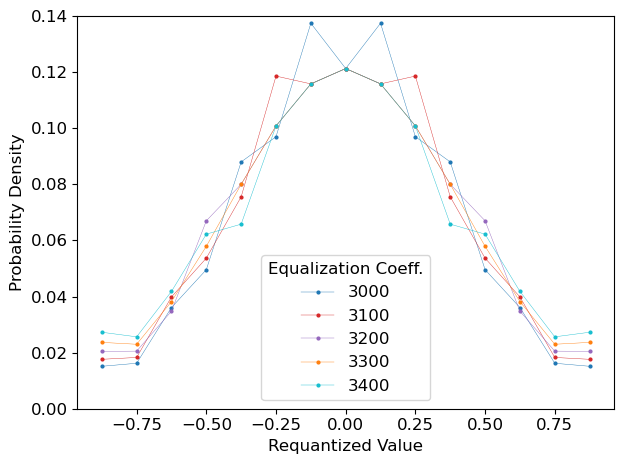

In [18]:
for coeff_ind, eq_coeff in enumerate(eq_coeffs):
    plt.plot(
        final_quantized_value_options,
        final_quantized_probabilities[:, coeff_ind],
        ".-",
        markersize=4,
        linewidth=0.3,
        label=eq_coeff,
    )
plt.xlabel("Requantized Value")
plt.ylabel("Probability Density")
plt.legend(title="Equalization Coeff.")
plt.ylim([0,0.14])
plt.tight_layout()

# How Much Equalization Can We Handle?

In [19]:
channel_width_mhz = 23925.78125 * 1e-6
freq_array = np.arange(50) * channel_width_mhz
avg_eq_coeff = 30000
eq_coeff_slope = 300
eq_coeffs = freq_array * eq_coeff_slope
eq_coeffs += avg_eq_coeff - np.mean(eq_coeffs)
target_value = 3 / 2**3
data_stddev = target_value / eq_coeffs

In [20]:
final_variances = simulation_scripts.requantization_sim(
    data_stddev,
    eq_coeffs,
)

Processing frequency 1 of 50.
Processing frequency 11 of 50.
Processing frequency 21 of 50.
Processing frequency 31 of 50.
Processing frequency 41 of 50.


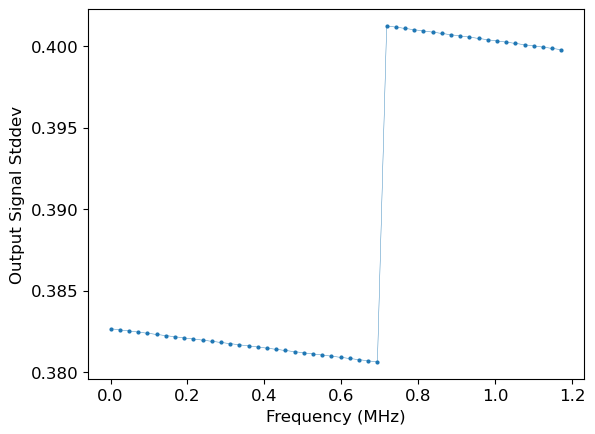

In [21]:
plt.plot(
    freq_array,
    np.sqrt(final_variances),
    ".-",
    markersize=4,
    linewidth=0.3,
    color="tab:blue",
)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Output Signal Stddev")
plt.show()

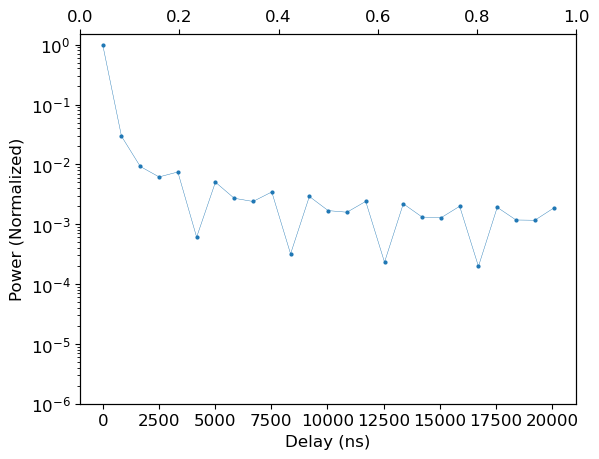

In [25]:
final_variances_fft = np.abs(np.fft.fft(final_variances))[0:int(len(final_variances)/2)]
final_variances_fft /= np.max(final_variances_fft)
delay_ns = np.fft.fftfreq(len(final_variances), d=channel_width_mhz * 1e6)[
    0 : int(len(final_variances) / 2)
] * 1e9

fig, ax = plt.subplots()
ax.plot(delay_ns, final_variances_fft, ".-", markersize=4, linewidth=0.3)
ax.set_yscale("log")
ax.set_xlabel("Delay (ns)")
ax.set_ylabel("Power (Normalized)")
ax.set_ylim([1e-6, 1.5])

ax2 = ax.twiny()